In [37]:
import numpy as np
import skimage 
import matplotlib.pyplot as plt
from scipy.stats import entropy
from skimage.morphology import disk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['entropy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
path_to_data = 'Fixed_EB128_4_laser_powers_0.2steps_17_MMStack_Pos0.ome.tif'

In [6]:
import skimage 
from skimage import io
imsk = io.imread(path_to_data)
imsk.shape

(5, 81, 512, 512)

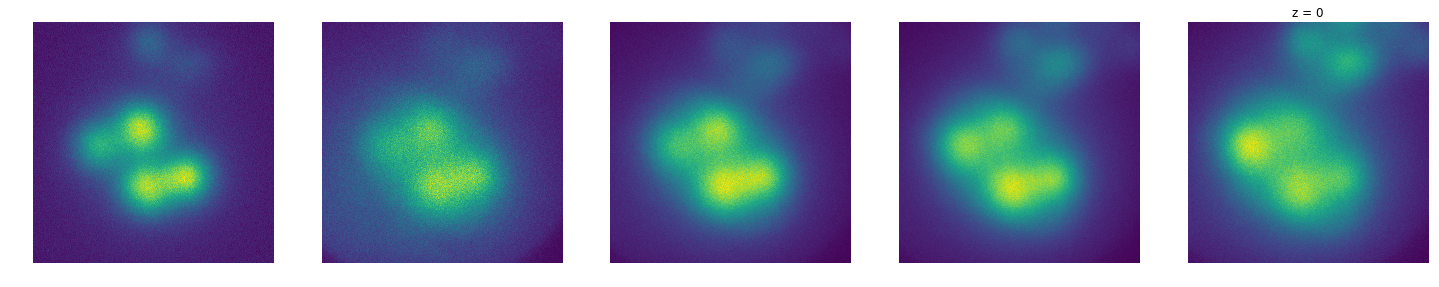

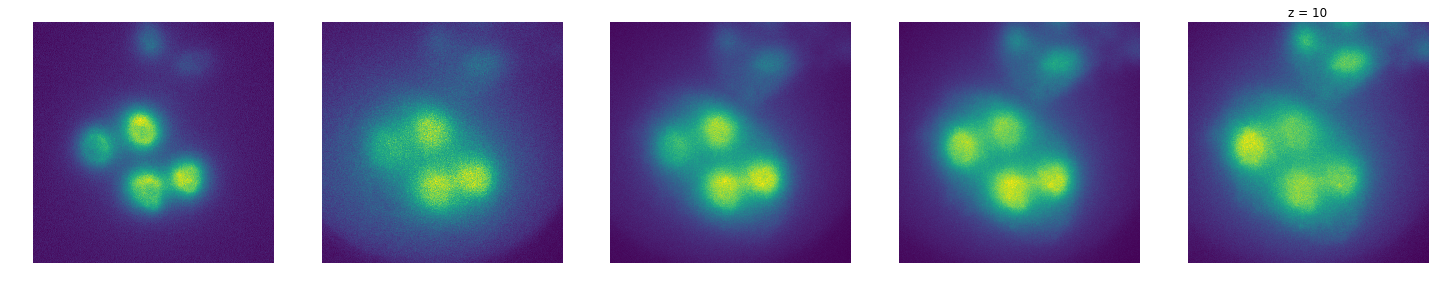

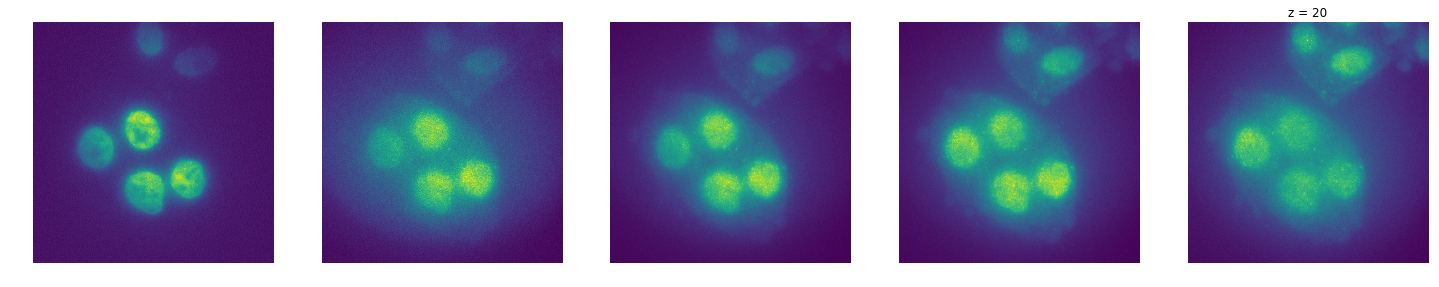

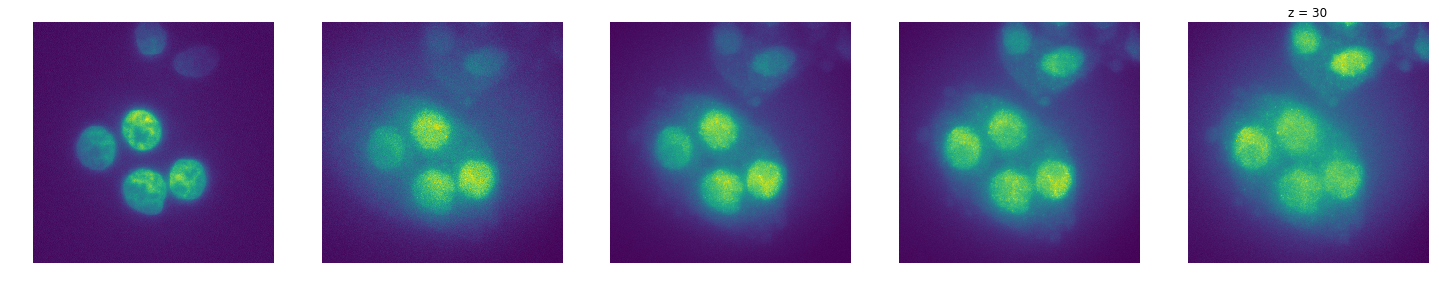

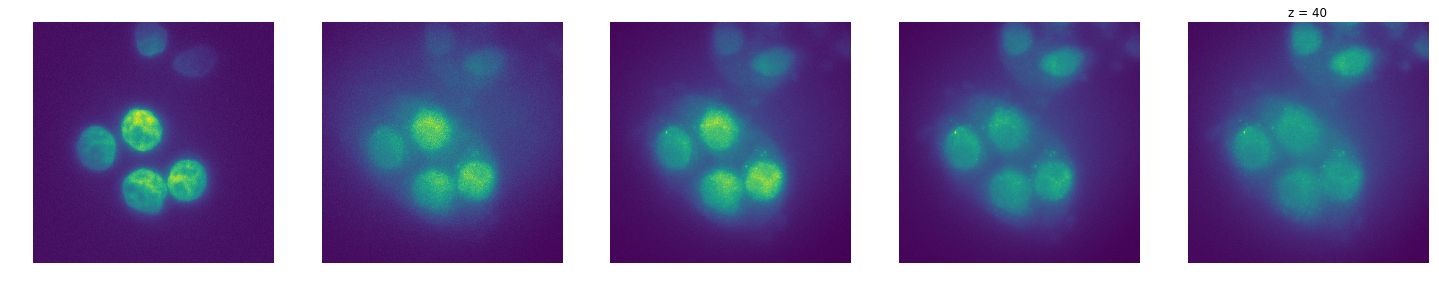

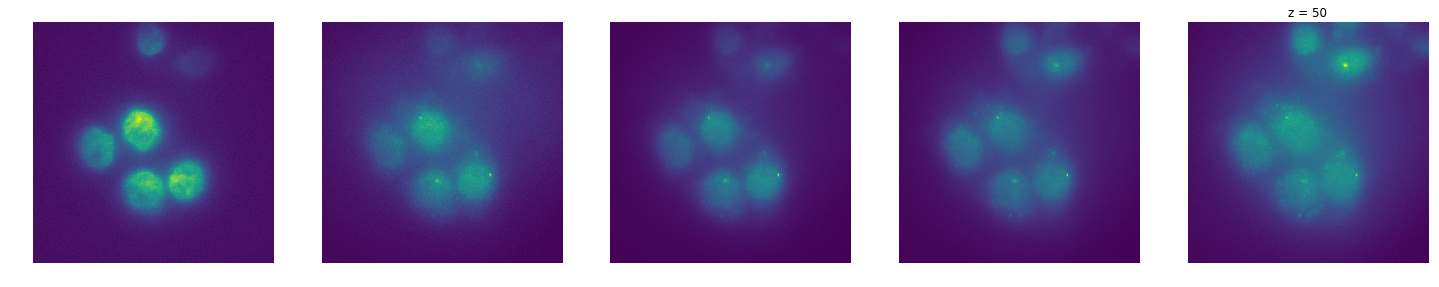

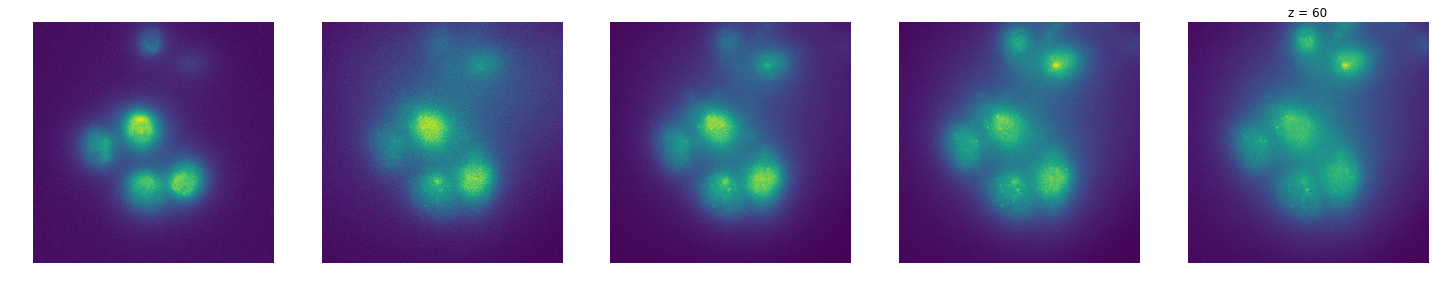

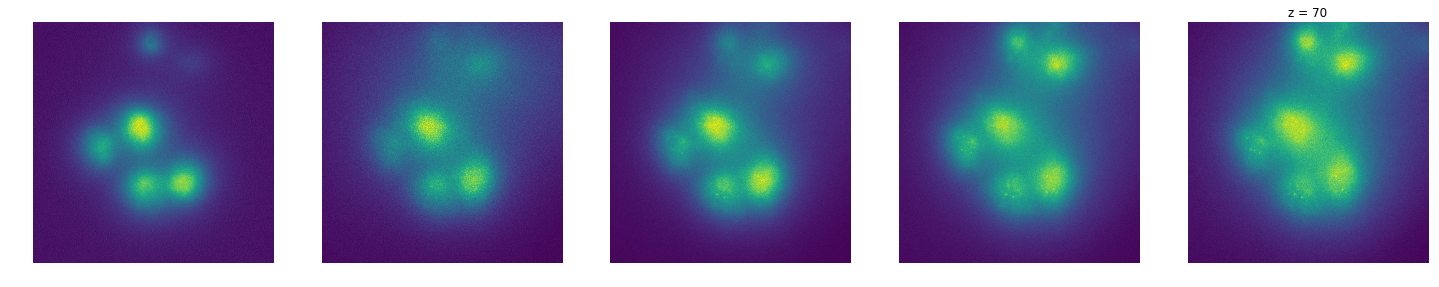

In [63]:
for i in range(0,80,10):
    fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
    ax[0].imshow(imsk[0,i,:,:]);
    ax[0].axis('off')
    ax[1].imshow(imsk[1,i,:,:]);
    ax[1].axis('off')
    ax[2].imshow(imsk[2,i,:,:]);
    ax[2].axis('off')
    ax[3].imshow(imsk[3,i,:,:]);
    ax[3].axis('off')
    ax[4].imshow(imsk[4,i,:,:]);
    ax[4].axis('off')
    plt.title('z = '+str(i))
    plt.show()

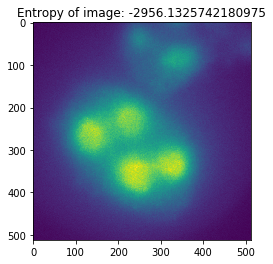

In [44]:
plt.imshow(imsk[3, 10, :, :])
plt.title("Entropy of image: {}".format(entropy(imsk[3, 10, :, :], 2)))

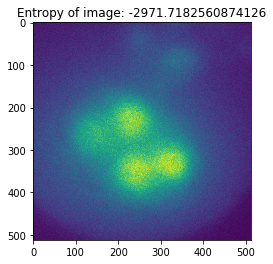

In [50]:
plt.imshow(imsk[1, 10, :, :])
plt.title("Entropy of image: {}".format(entropy(imsk[1, 10, :, :], 2)))

In [52]:
high_entr = -99999999
low_entr = 1
for i in range(81):
    for j in range(5):
        cur_entr = entropy(imsk[j, i, :, :], 2)
        if cur_entr < low_entr:
            low_entr = cur_entr
            low_ix = [j, i]
        if cur_entr > high_entr:
            high_entr = cur_entr
            high_ix = [j, i]

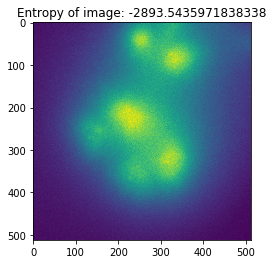

In [54]:
plt.imshow(imsk[high_ix[0], high_ix[1], :, :])
plt.title("Entropy of image: {}".format(entropy(imsk[high_ix[0], high_ix[1], :, :], 2)))

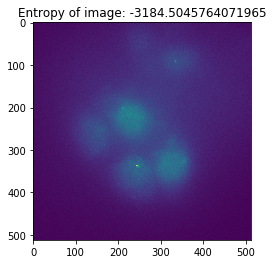

In [55]:
plt.imshow(imsk[low_ix[0], low_ix[1], :, :])
plt.title("Entropy of image: {}".format(entropy(imsk[low_ix[0], low_ix[1], :, :], 2)))

In [48]:
entropy(np.ones((512,512)),2)

-3194.7153552007881

In [66]:
# normalize to std of pixel dist
# for entropy
imsk[3, 10, :, :]

array([[1089, 1169, 1286, ..., 2379, 2044, 2390],
       [1139, 1210, 1364, ..., 2708, 2288, 2399],
       [1152, 1311, 1184, ..., 2529, 2525, 2262],
       ..., 
       [ 936, 1118, 1560, ..., 1011, 1017, 1092],
       [1070, 1356, 1150, ...,  899, 1190,  732],
       [ 959, 1206, 1232, ..., 1041,  919,  834]], dtype=uint16)

In [ ]:
# PIL 16 bit?
